In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['^NDX','^NSEI']
df = pd.DataFrame()
for ticker in tickers:
    df_tmp=yf.download(ticker, start='2010-01-01', end='2023-05-01')
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close   
Date                                                                 
2010-01-04   1882.689941   1890.020020   1881.630005   1886.699951  \
2010-01-05   1887.280029   1891.329956   1877.520020   1888.430054   
2010-01-06   1887.910034   1893.209961   1873.900024   1878.420044   
2010-01-07   1878.160034   1881.329956   1867.619995   1876.719971   
2010-01-08   1870.900024   1893.250000   1868.550049   1892.589966   
...                  ...           ...           ...           ...   
2023-04-24  17707.550781  17754.500000  17612.500000  17743.400391   
2023-04-25  17761.550781  17807.449219  17716.849609  17769.250000   
2023-04-26  17767.300781  17827.750000  17711.199219  17813.599609   
2023-04-27  17813.099609  17931.599609  17797.900391  17915.050781   
2023-04-28  17950.400391  18089.150391  17885.300781  18065.000000   

               Adj Close      Volume Ticker  
Date                                         
2010-01-04   1886.699951  1931380000   ^NDX  
2010-01-05   1888.430054  2367860000   ^NDX  
2010-01-06   1878.420044  2253340000   ^NDX  
2010-01-07   1876.719971  2270050000   ^NDX  
2010-01-08   1892.589966  2145390000   ^NDX  
...                  ...         ...    ...  
2023-04-24  17743.400391      255700  ^NSEI  
2023-04-25  17769.250000      297400  ^NSEI  
2023-04-26  17813.599609      233000  ^NSEI  
2023-04-27  17915.050781      241400  ^NSEI  
2023-04-28  18065.000000      290300  ^NSEI  

[6621 rows x 7 columns]

In [3]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce',utc=True)
df['Date']=df['Date'].dt.strftime("%Y-%m-%d")
df

Date          Open          High           Low         Close   
0     2010-01-04   1882.689941   1890.020020   1881.630005   1886.699951  \
1     2010-01-05   1887.280029   1891.329956   1877.520020   1888.430054   
2     2010-01-06   1887.910034   1893.209961   1873.900024   1878.420044   
3     2010-01-07   1878.160034   1881.329956   1867.619995   1876.719971   
4     2010-01-08   1870.900024   1893.250000   1868.550049   1892.589966   
...          ...           ...           ...           ...           ...   
6616  2023-04-24  17707.550781  17754.500000  17612.500000  17743.400391   
6617  2023-04-25  17761.550781  17807.449219  17716.849609  17769.250000   
6618  2023-04-26  17767.300781  17827.750000  17711.199219  17813.599609   
6619  2023-04-27  17813.099609  17931.599609  17797.900391  17915.050781   
6620  2023-04-28  17950.400391  18089.150391  17885.300781  18065.000000   

         Adj Close      Volume Ticker  
0      1886.699951  1931380000   ^NDX  
1      1888.430054  2367860000   ^NDX  
2      1878.420044  2253340000   ^NDX  
3      1876.719971  2270050000   ^NDX  
4      1892.589966  2145390000   ^NDX  
...            ...         ...    ...  
6616  17743.400391      255700  ^NSEI  
6617  17769.250000      297400  ^NSEI  
6618  17813.599609      233000  ^NSEI  
6619  17915.050781      241400  ^NSEI  
6620  18065.000000      290300  ^NSEI  

[6621 rows x 8 columns]

# Task 1


In [4]:
df_mod = df[['Date', 'Ticker', 'Adj Close']]
df_mod.columns = ['date', 'ticker', 'price']
df_mod

date ticker         price
0     2010-01-04   ^NDX   1886.699951
1     2010-01-05   ^NDX   1888.430054
2     2010-01-06   ^NDX   1878.420044
3     2010-01-07   ^NDX   1876.719971
4     2010-01-08   ^NDX   1892.589966
...          ...    ...           ...
6616  2023-04-24  ^NSEI  17743.400391
6617  2023-04-25  ^NSEI  17769.250000
6618  2023-04-26  ^NSEI  17813.599609
6619  2023-04-27  ^NSEI  17915.050781
6620  2023-04-28  ^NSEI  18065.000000

[6621 rows x 3 columns]

In [5]:
df1 = df_mod.pivot_table(index=['date'], columns='ticker', values=['price'])
df1.columns = [col[1] for col in df1.columns.values]
df1=df1.dropna() #dropping the days of holiday in either of the two indexes.
df1

^NDX         ^NSEI
date                                  
2010-01-04   1886.699951   5232.200195
2010-01-05   1888.430054   5277.899902
2010-01-06   1878.420044   5281.799805
2010-01-07   1876.719971   5263.100098
2010-01-08   1892.589966   5244.750000
...                  ...           ...
2023-04-24  12969.759766  17743.400391
2023-04-25  12725.110352  17769.250000
2023-04-26  12806.480469  17813.599609
2023-04-27  13160.030273  17915.050781
2023-04-28  13245.990234  18065.000000

[3182 rows x 2 columns]

In [6]:
df_daily_returns = df1.pct_change() #daily return computed
df_daily_returns = df_daily_returns[1:]
df_daily_returns

^NDX     ^NSEI
date                          
2010-01-05  0.000917  0.008734
2010-01-06 -0.005301  0.000739
2010-01-07 -0.000905 -0.003540
2010-01-08  0.008456 -0.003487
2010-01-11 -0.003355  0.000887
...              ...       ...
2023-04-24 -0.002385  0.006772
2023-04-25 -0.018863  0.001457
2023-04-26  0.006394  0.002496
2023-04-27  0.027607  0.005695
2023-04-28  0.006532  0.008370

[3181 rows x 2 columns]

In [7]:
corr=df_daily_returns['^NDX'].corr(df_daily_returns['^NSEI'])
corr

0.2528694836579716

In [8]:
corr=df1['^NDX'].corr(df1['^NSEI'])
corr

0.9548767284940564

Therefore Correlation = +0.954

# Task 2

In [9]:
import plotly.express as px
fig = px.line(df_mod, x='date',
              y='price', color='ticker',
              title='Performance - Daily Simple Returns',
              labels={'daily_return_pct':'daily returns (%)'})
fig.show()

In [10]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df2 = df_daily_returns.melt(id_vars=['date'], var_name='ticker', value_name='daily_return')
# add one more column, showing the daily_return as percent
df2['daily_return_pct'] = df2['daily_return'] * 100
df2

date ticker  daily_return  daily_return_pct
0     2010-01-05   ^NDX      0.000917          0.091700
1     2010-01-06   ^NDX     -0.005301         -0.530070
2     2010-01-07   ^NDX     -0.000905         -0.090505
3     2010-01-08   ^NDX      0.008456          0.845624
4     2010-01-11   ^NDX     -0.003355         -0.335518
...          ...    ...           ...               ...
6357  2023-04-24  ^NSEI      0.006772          0.677197
6358  2023-04-25  ^NSEI      0.001457          0.145686
6359  2023-04-26  ^NSEI      0.002496          0.249586
6360  2023-04-27  ^NSEI      0.005695          0.569515
6361  2023-04-28  ^NSEI      0.008370          0.837001

[6362 rows x 4 columns]

In [11]:
fig = px.line(df2, x='date',
              y='daily_return_pct', color='ticker',
              title='Performance - Daily Simple Returns',
              labels={'daily_return_pct':'daily returns (%)'})
fig.show()

In [12]:
# data=df_daily_returns
data=df1
data['^NSEI_Lagged'] = data['^NSEI'].shift(1)  # Lag the returns of Index2 by 1 day

data['^NDX_Leads'] = np.where(data['^NDX'] > data['^NSEI_Lagged'], 1, 0)
data['^NSEI_Leads'] = np.where(data['^NSEI_Lagged'] > data['^NDX'], 1, 0)

In [13]:
if data['^NDX_Leads'].sum() > data['^NSEI_Leads'].sum():
    index_for_optimization = '^NDX'
else:
    index_for_optimization = '^NSEI'

print('Index for parameter optimization:', index_for_optimization)

Index for parameter optimization: ^NSEI


Based on the observed lead-lag relationship, it has been consistently observed that NASDAQ tends to lead NSE, implying that changes in NASDAQ generally occur prior to changes in NSE. Consequently, selecting NASDAQ as the basis for parameter optimization is anticipated to yield more favorable outcomes.

# Task 3

Keltner Channel

In [14]:
data=yf.download('^NSEI', start='2010-1-1', end='2023-5-1')
data['KC_EMA'] = data['Close'].ewm(span=20, adjust=False).mean() #Calculation of exponential moving average
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_EMA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_EMA'] - (2 * data['KC_ATR'])

[*********************100%***********************]  1 of 1 completed


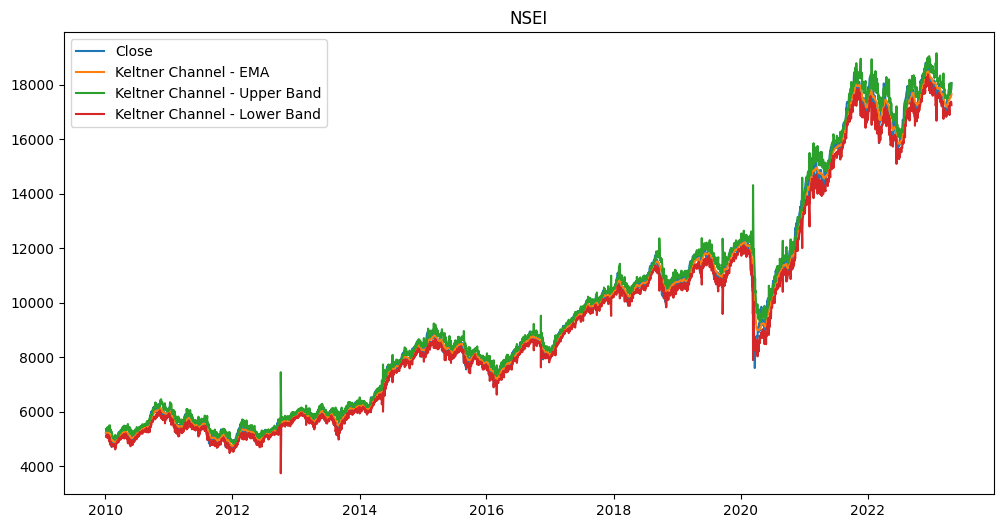

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_EMA'], label='Keltner Channel - EMA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("NSEI")
plt.legend()
plt.show()

Defining Strategy for Keltner Channel

In [16]:
def keltner(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal

In [17]:
buy_price, sell_price, kc_signal = keltner(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

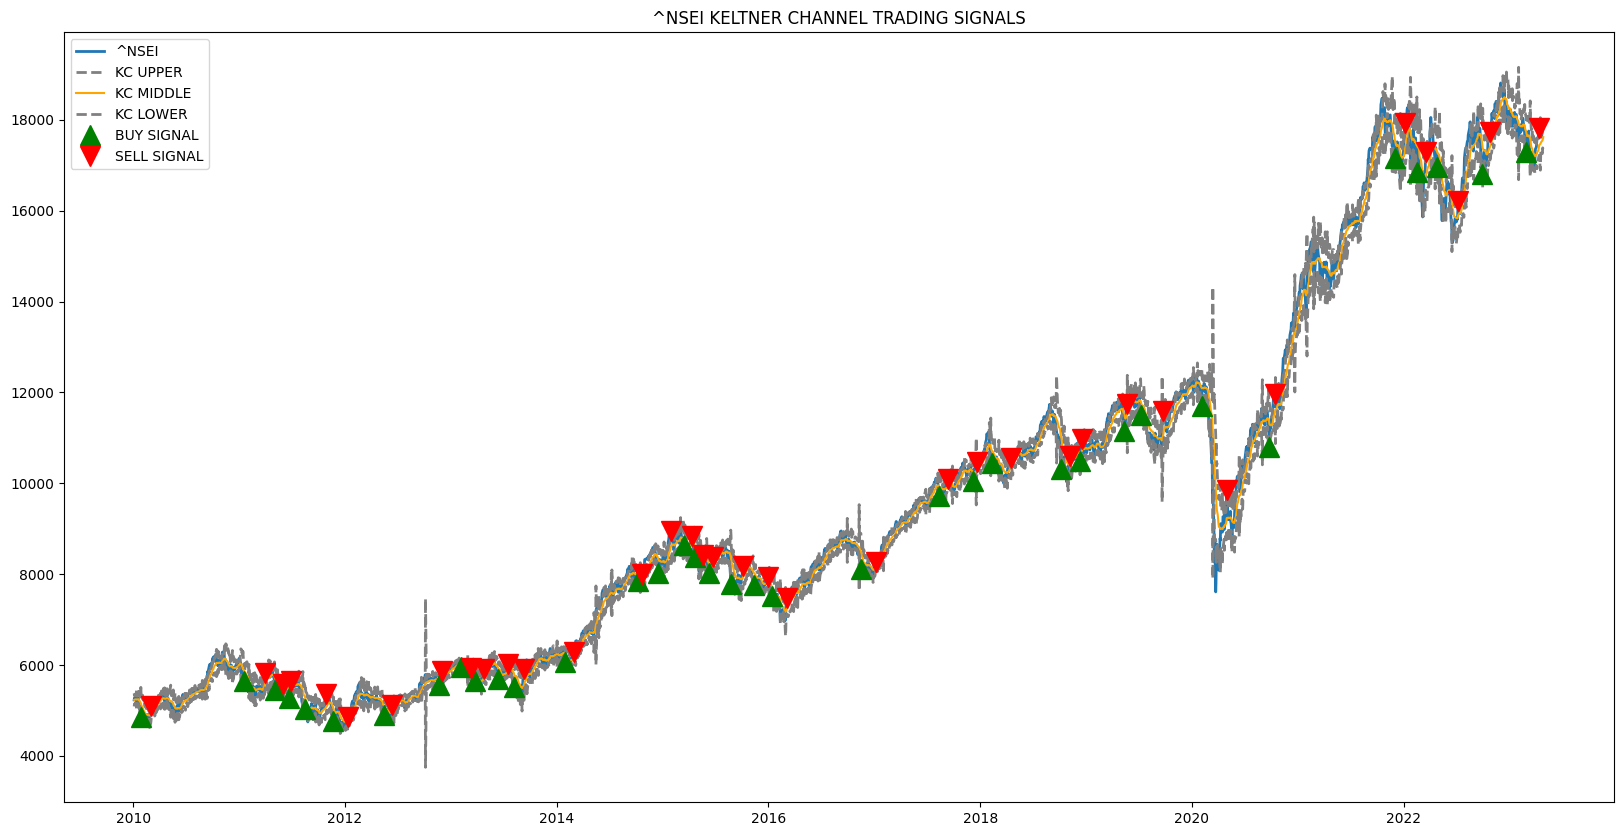

In [18]:

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'grey', linestyle = '--', label = 'KC UPPER')
plt.plot(data['KC_EMA'], linewidth = 1.5, color = 'orange', label = 'KC MIDDLE')
plt.plot(data['KC_LB'], linewidth = 2, color = 'grey', linestyle = '--', label = 'KC LOWER')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('^NSEI KELTNER CHANNEL TRADING SIGNALS')
plt.show()

In [19]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

In [20]:
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()

473.68244139354596

In [21]:
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [22]:
import math
def sharpe_ratio(data, risk_free_rate=0.04):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.5258182133624594

In [23]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.33309322925180906

In [24]:
print("Maximum Drawdown_KC",(np1-np2).min()/np2[18,0]*100,"%")

Maximum Drawdown_KC -14.252696626295021 %


In [25]:
print("Cumulative Return_KC",((np2-np1)/np1).max()*100,"%")

Cumulative Return_KC 11.489076030873765 %


Bollinger Bands

In [26]:
data=yf.download('^NSEI', start='2010-01-01', end='2023-05-01')
data['BB_SMA'] = data['Close'].rolling(window=20).mean() #using simple moving average for Bollinger bands.
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_UB'] = data['BB_SMA'] + (2 * data['BB_std'])
data['BB_LB'] = data['BB_SMA'] - (2 * data['BB_std'])

[*********************100%***********************]  1 of 1 completed


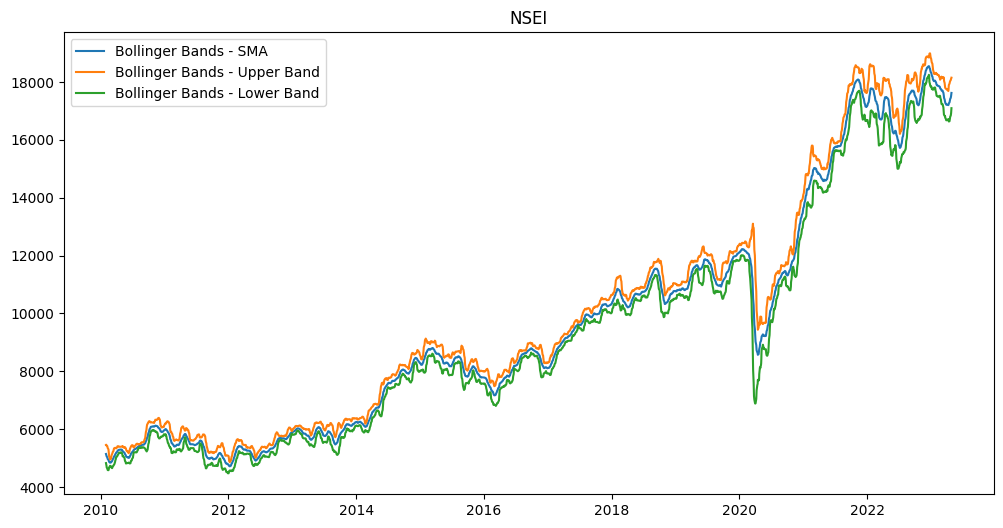

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data['BB_SMA'], label='Bollinger Bands - SMA')
plt.plot(data['BB_UB'], label='Bollinger Bands - Upper Band')
plt.plot(data['BB_LB'], label='Bollinger Bands - Lower Band')
plt.legend(loc='best')
plt.title("NSEI")
plt.show()

Defining Strategy for Bollinger Bands

In [28]:
def bollinger(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal


In [29]:
buy_price_bb, sell_price_bb, bb_signal = bollinger(data['Close'], data['BB_UB'], data['BB_LB'])


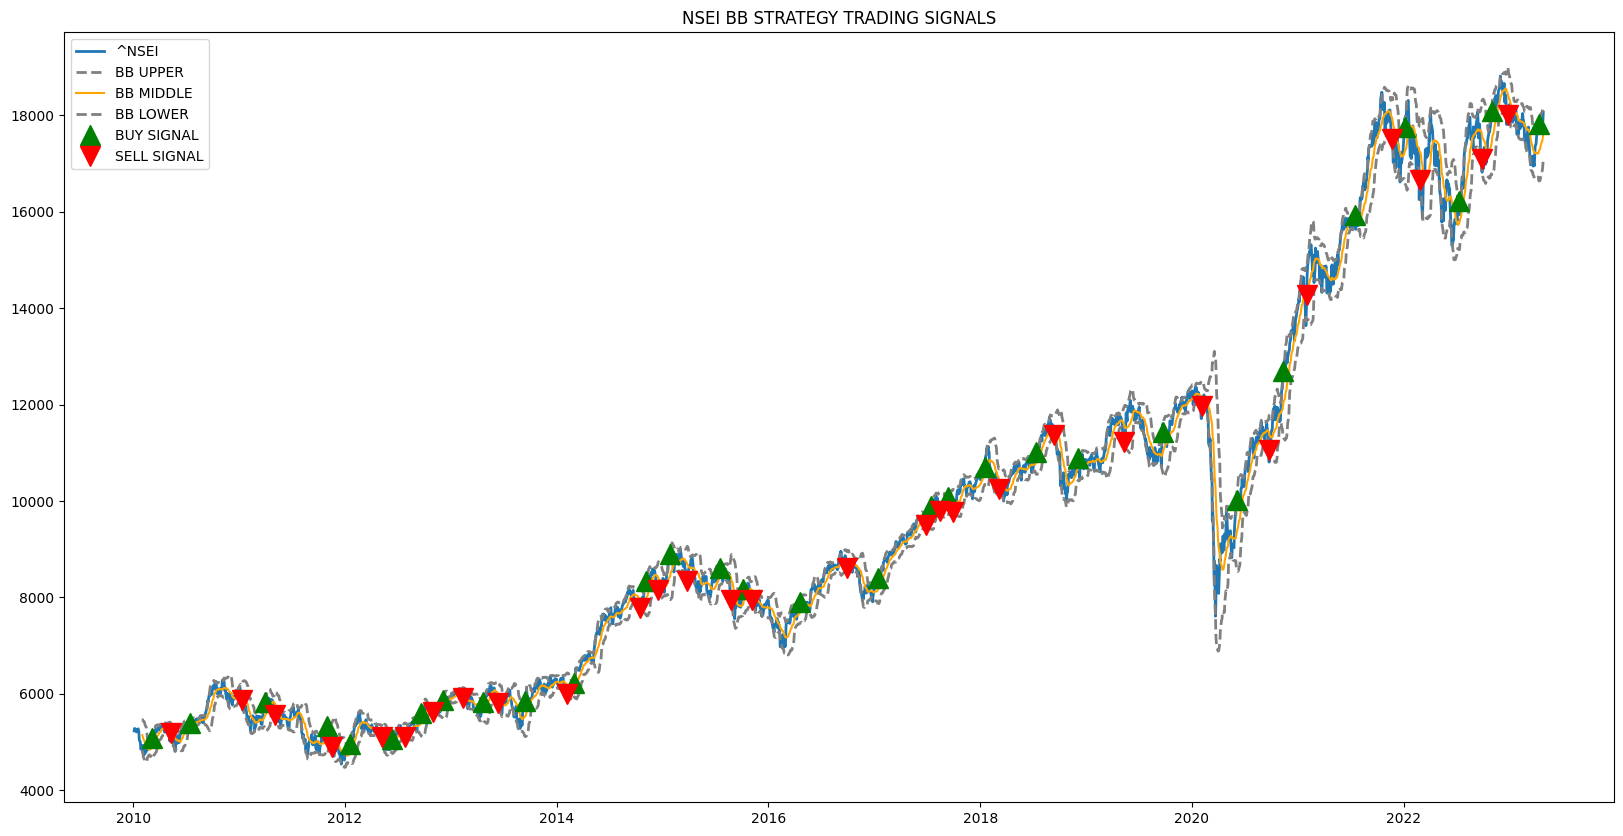

In [30]:
plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['BB_UB'], linewidth = 2, color = 'grey', linestyle = '--', label = 'BB UPPER')
plt.plot(data['BB_SMA'], linewidth = 1.5, color = 'orange', label = 'BB MIDDLE')
plt.plot(data['BB_LB'], linewidth = 2, color = 'grey', linestyle = '--', label = 'BB LOWER')
plt.plot(data.index, buy_price_bb, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price_bb, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('NSEI BB STRATEGY TRADING SIGNALS')
plt.show()

In [31]:
buy_price_bb=pd.DataFrame(buy_price_bb)
buy_price_bb=buy_price_bb.fillna(0)
buy_price_bb=buy_price_bb[~(buy_price_bb == 0).all(axis=1)]
sell_price_bb=pd.DataFrame(sell_price_bb)
sell_price_bb=sell_price_bb.fillna(0)
sell_price_bb=sell_price_bb[~(sell_price_bb == 0).all(axis=1)]

In [32]:
np_buy_bb=np.array(buy_price_bb)
np_buy_bb = np_buy_bb[:-1]
np_sell_bb=np.array(sell_price_bb)
(np_sell_bb-np_buy_bb).mean()

216.96383351293105

In [33]:
def sharpe_ratio(data, risk_free_rate=0.04):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_bb-np_buy_bb)

0.3240500514250054

In [34]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_bb-np_buy_bb)

0.7512898905355797

In [35]:
print("Maximum Drawdown_BB",(np_buy_bb-np_sell_bb).min()/np_sell_bb[6,0]*100,"%")

Maximum Drawdown_BB -28.300449051562993 %


In [36]:
print("Cumulative Return_BB",((np_sell_bb-np_buy_bb)/np_buy_bb).max()*100,"%")

Cumulative Return_BB 25.046411223769834 %


Defining strategy for macd

In [37]:
data=yf.download('^NSEI', start='2010-01-01', end='2023-05-01')
data['MACD_12EMA'] = data['Close'].ewm(span=12, adjust=False).mean() #12 day exponential mean average
data['MACD_26EMA'] = data['Close'].ewm(span=26, adjust=False).mean() #26 day exponential mean average
data['MACD'] = data['MACD_12EMA'] - data['MACD_26EMA']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

[*********************100%***********************]  1 of 1 completed


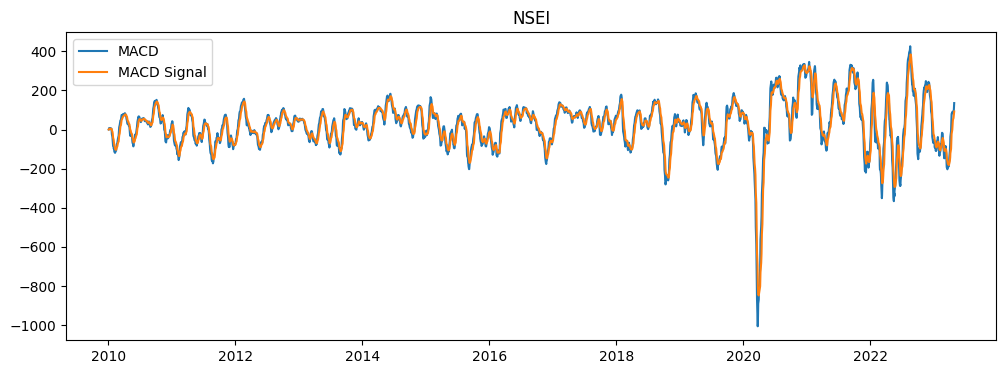

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='MACD Signal')

plt.legend()
plt.title("NSEI")
plt.show()

In [39]:
def macd_sig(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACD_Signal'][i]:         # first occurence of MACD crossing above signal one
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACD_Signal'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = macd_sig(data)
data['buy_sig'] = signal[0]
data['sell_sig'] = signal[1]

In [40]:
buy_sig_md=pd.DataFrame(data['buy_sig']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(data['sell_sig']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

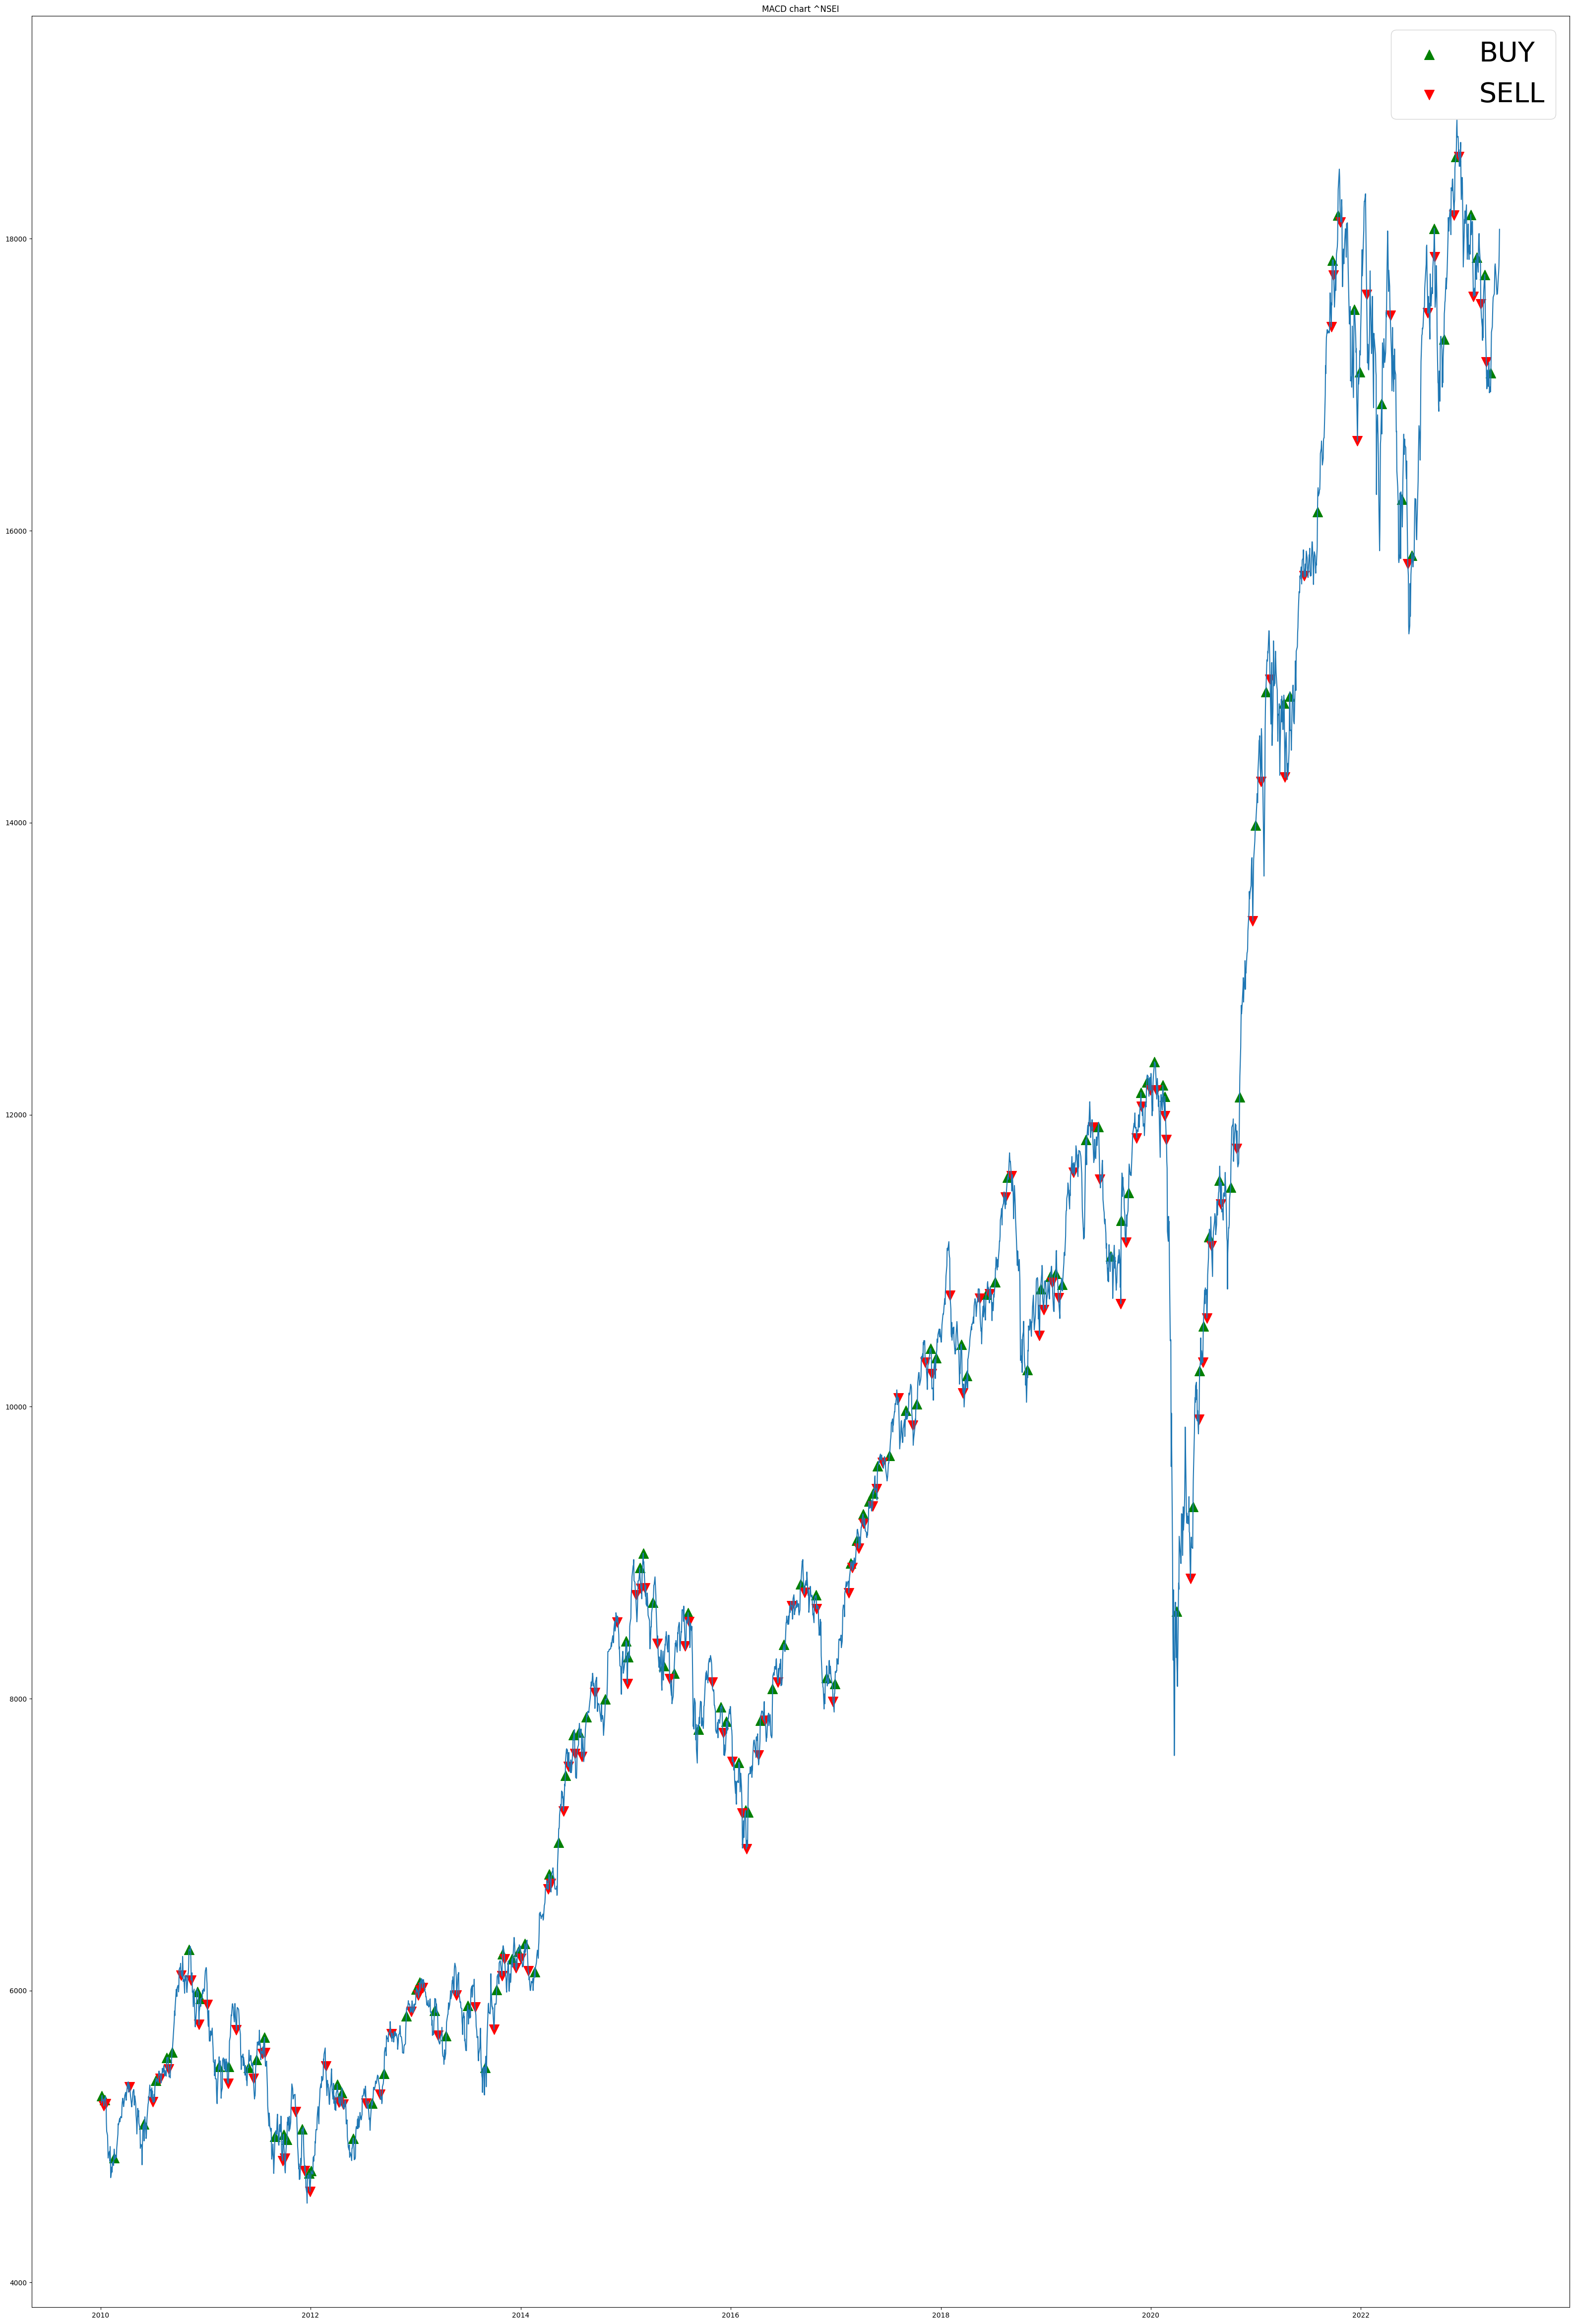

In [41]:
plt.figure(figsize=(40,60))
plt.plot( data['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.scatter(data.index, data.buy_sig, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, data.sell_sig, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [42]:
np_buy_md=np_buy_md[:-1]
(np_sell_md-np_buy_md).mean()

60.898765625

In [43]:
def sharpe_ratio(data, risk_free_rate=0.04):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_md-np_buy_md)

0.16675361734907584

In [44]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_md-np_buy_md)

0.38904088624809824

In [45]:
pd.DataFrame(np_buy_md-np_sell_md).idxmin()
print("Maximum drawdown_MACD",(np_buy_md-np_sell_md).min()/np_sell_md[22,0]*100,"%")
print("Cumulative Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

Maximum drawdown_MACD -31.758770836202398 %
Cumulative Return_MACD 15.06725766327907 %


Keltner Channel

[*********************100%***********************]  1 of 1 completed


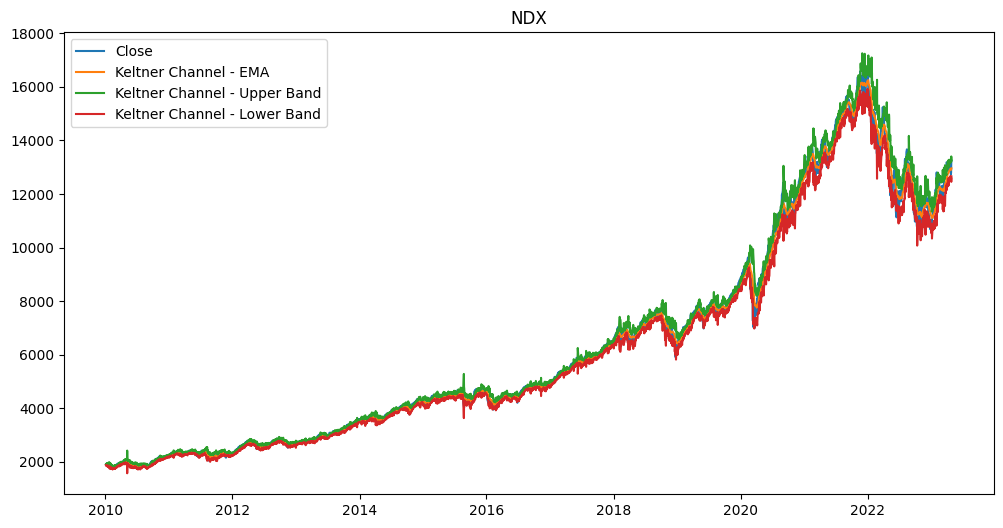

In [46]:
data=yf.download('^NDX', start='2010-1-1', end='2023-5-1')
data['KC_EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_EMA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_EMA'] - (2 * data['KC_ATR'])
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_EMA'], label='Keltner Channel - EMA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("NDX")
plt.legend()
plt.show()


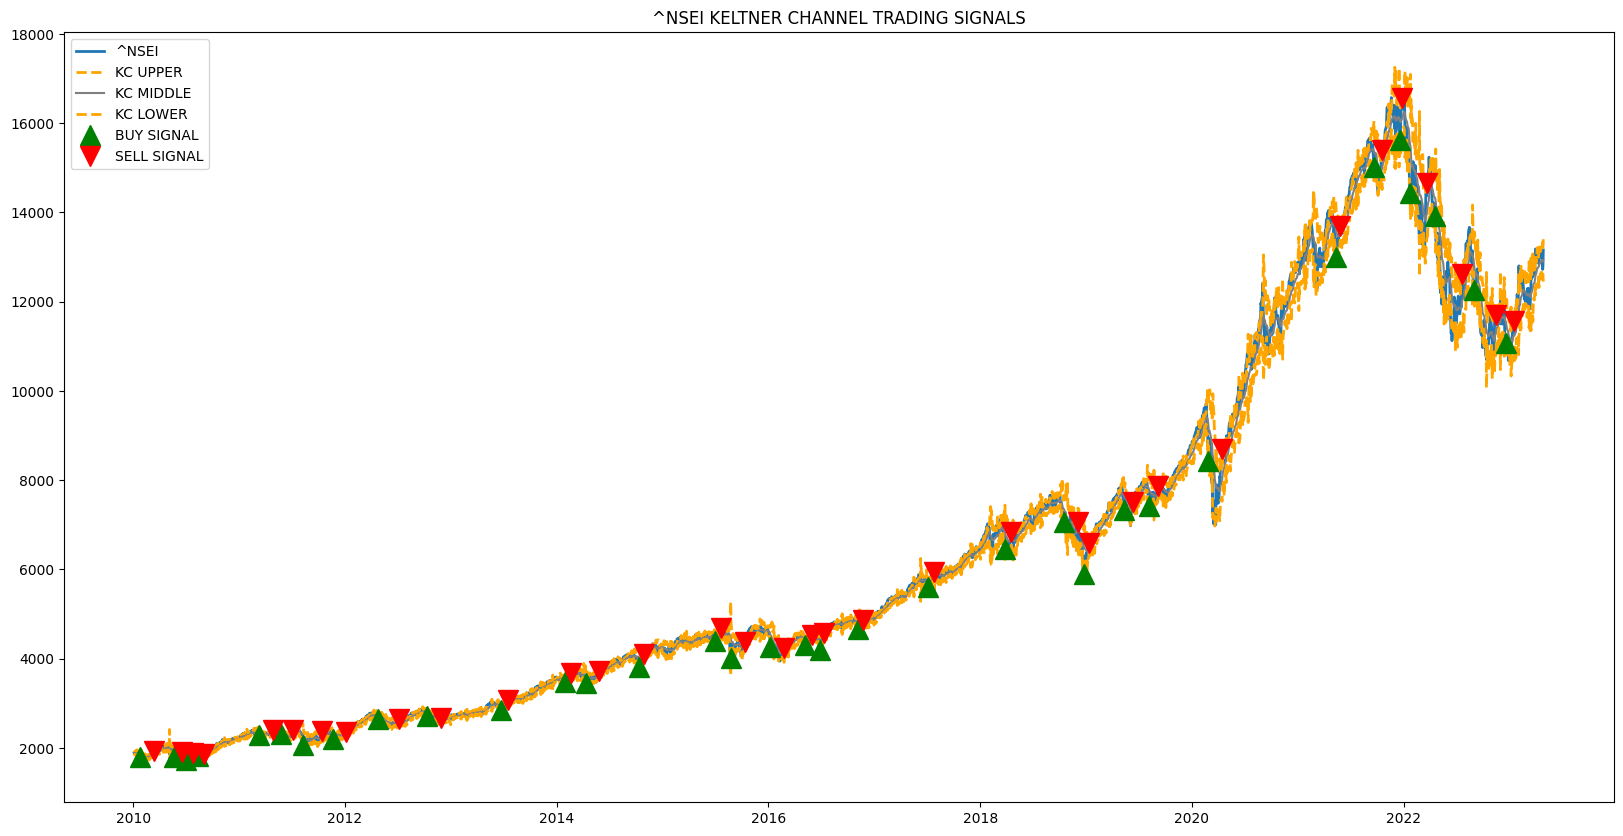

In [47]:
def keltner(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = keltner(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER')
plt.plot(data['KC_EMA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('^NSEI KELTNER CHANNEL TRADING SIGNALS')
plt.show()

In [48]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [49]:
import math
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)
sharpe_ratio(np2-np1)

0.5456285477502468

In [50]:


def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.396273730582679

In [51]:
print("Maximum Drawdown_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("Cumulative Return_KC",((np2-np1)/np1).max()*100,"%")

Maximum Drawdown_KC -20.531683119207635 %
Cumulative Return_KC 15.12650628964653 %


# Task 4

In [52]:
from sklearn.model_selection import GridSearchCV
import ta
from sklearn.base import BaseEstimator
# Custom estimator class for Keltner Channel
class KeltnerChannelEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.KeltnerChannel(X['Close'], X['Low'], X['Close'], window=self.window, fillna=True)
        return self

# Custom estimator class for Bollinger Bands
class BollingerBandsEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.BollingerBands(X['Close'], window=self.window, fillna=True)
        return self
# Custom estimator class for MACD

class MACDEstimator(BaseEstimator):
    def __init__(self, window_slow, window_fast):
        self.window_slow = window_slow
        self.window_fast = window_fast

    def fit(self, X, y=None):
        indicator = ta.trend.MACD(X['Close'], window_slow=self.window_slow, window_fast=self.window_fast, fillna=True)
        return self


nsei_data = df[df['Ticker'] == '^NSEI']
# Define the parameter grid for each indicator
keltner_params = {'window': [10, 20, 30]}
bollinger_params = {'window': [10, 20, 30]}
macd_params = {'window_slow': [26, 30, 34], 'window_fast': [12, 14, 16]}

ndx_data=df[df['Ticker'] == '^NDX']
# Define the scoring metrics for evaluation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}

# Perform grid search for Keltner Channel
keltner_grid = GridSearchCV(estimator=KeltnerChannelEstimator(window=10), param_grid=keltner_params, scoring=scoring, refit=False)
keltner_grid.fit(ndx_data)
keltner_results = pd.DataFrame(keltner_grid.cv_results_)

# Perform grid search for Bollinger Bands
bollinger_grid = GridSearchCV(estimator=BollingerBandsEstimator(window=10), param_grid=bollinger_params, scoring=scoring, refit=False)
bollinger_grid.fit(ndx_data)
bollinger_results = pd.DataFrame(bollinger_grid.cv_results_)


 # Create an instance of MACDEstimator
macd_estimator = MACDEstimator(window_slow=26, window_fast=12)

macd_grid = GridSearchCV(estimator=macd_estimator, param_grid=macd_params, scoring=scoring, refit=False)
macd_grid.fit(ndx_data)
macd_results = pd.DataFrame(macd_grid.cv_results_)



# Evaluate the grid search results
keltner_best_params = keltner_results.loc[keltner_results['rank_test_accuracy'] == 1, 'params'].values[0]
bollinger_best_params = bollinger_results.loc[bollinger_results['rank_test_accuracy'] == 1, 'params'].values[0]
macd_best_params = macd_results.loc[macd_results['rank_test_accuracy'] == 1, 'params'].values[0]

print("Optimized Parameters:")
print("Keltner Channel:", keltner_best_params)
print("Bollinger Bands:", bollinger_best_params)
print("MACD:", macd_best_params)

Optimized Parameters:
Keltner Channel: {'window': 10}
Bollinger Bands: {'window': 10}
MACD: {'window_fast': 12, 'window_slow': 26}


/home/manan/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/manan/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'


/home/manan/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan]

/home/manan/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]



# Task 5

In [53]:
# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(ndx_data['Close'], ndx_data['Low'], ndx_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(ndx_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(ndx_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(ndx_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(ndx_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': ndx_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * ndx_data['Close'].pct_change()

# Calculate additional metrics
total_trades = len(signals)
positive_trades = len(signals[signals['Return'] > 0])
negative_trades = len(signals[signals['Return'] < 0])
favourable = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Favourable (%):", favourable)


Generated Signals:
            Date  Signal    Return
0     2010-01-04      -1       NaN
1     2010-01-05       1 -0.000917
2     2010-01-06      -1  0.005301
3     2010-01-07      -1 -0.000000
4     2010-01-08       0 -0.008456
...          ...     ...       ...
3348  2023-04-24      -1  0.004770
3349  2023-04-25      -2  0.018863
3350  2023-04-26      -1  0.000000
3351  2023-04-27       0  0.000000
3352  2023-04-28       0       NaN

[3353 rows x 3 columns]

Metrics:
Total Trades: 3353
Positive Trades: 1878
Negative Trades: 1130
Favourable (%): 56.00954369221592


In [54]:

# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(nsei_data['Close'], nsei_data['Low'], nsei_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(nsei_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(nsei_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(nsei_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(nsei_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': nsei_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * nsei_data['Close'].pct_change()

# Calculate additional metrics
total_trades = len(signals)
positive_trades = len(signals[signals['Return'] > 0])
negative_trades = len(signals[signals['Return'] < 0])
favourable = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Favourable (%):", favourable)


Generated Signals:
            Date  Signal    Return
3353  2010-01-04      -1       NaN
3354  2010-01-05       1  0.008734
3355  2010-01-06       1  0.000739
3356  2010-01-07       1 -0.003540
3357  2010-01-08       1 -0.003487
...          ...     ...       ...
6616  2023-04-24       1  0.013544
6617  2023-04-25       2  0.002914
6618  2023-04-26       2  0.004992
6619  2023-04-27       2  0.011390
6620  2023-04-28       2       NaN

[3268 rows x 3 columns]

Metrics:
Total Trades: 3268
Positive Trades: 1913
Negative Trades: 1002
Favourable (%): 58.53733170134638
